In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2>Kuznets Curve for 1 Country

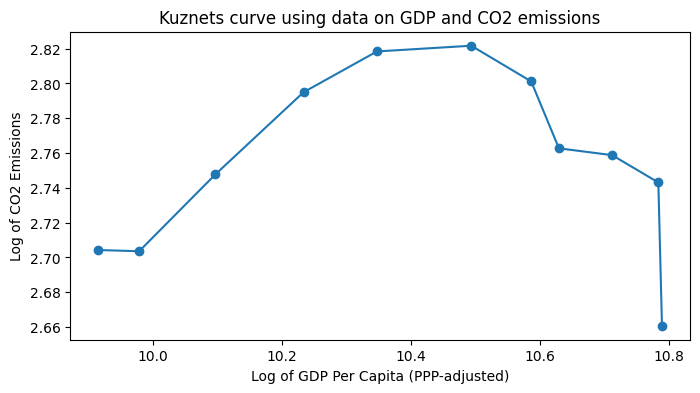

In [74]:
#read file
df = pd.read_csv('can.csv')

#rename and remove empty values
df = df.rename(columns={'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]' : 'gdp', 
                        'CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]' : 'co2'})
df = df.replace('..', np.nan).dropna()

#convert to numeric and apply log
cols = ['gdp', 'co2']
for col in cols:
    df[col] = pd.to_numeric(df[col])
    df[col] = np.log(df[col])

#group by 3 year intervals
df['year_group'] = df['Time'] // 3 * 3
avr_df = df.groupby('year_group')[['gdp','co2']].mean().reset_index()

#assign axis and labels
fig, ax = plt.subplots(1, 1, figsize = (8,4))
ax.scatter(avr_df['gdp'], avr_df['co2'])
ax.plot(avr_df['gdp'], avr_df['co2'])
ax.set_xlabel('Log of GDP Per Capita (PPP-adjusted)')
ax.set_ylabel(f'Log of CO2 Emissions')
ax.set_title(f'Kuznets curve using data on GDP and CO2 emissions')

#show plot
plt.show()

In [47]:
df.describe()

,Time,gdp,co2,year_group
count,31.000000,31.000000,31.000000,31.000000
mean,2005.000000,10.371569,2.826037,2004.000000
std,9.092121,0.358658,0.068736,9.165151
min,1990.000000,9.763126,2.693014,1989.000000
25%,1997.500000,10.075057,2.771943,1996.500000
50%,2005.000000,10.405371,2.821057,2004.000000
75%,2012.500000,10.700427,2.887714,2011.500000
max,2020.000000,10.882123,2.915321,2019.000000


<h2>Kuznets Curve for 5 Countries<h2>

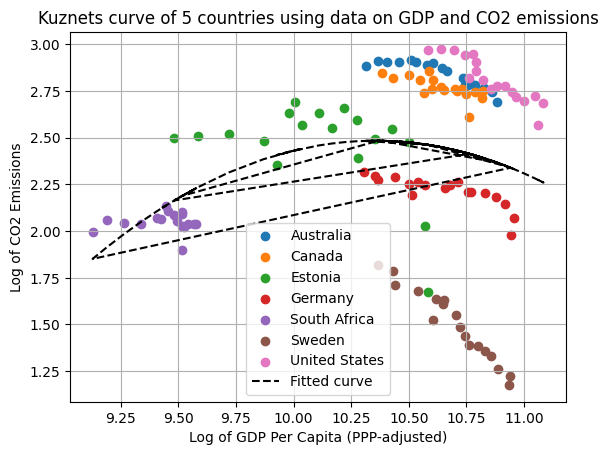

In [75]:
#read file
df_countries = pd.read_csv('countries_few.csv')

#rename and remove empty values
df_countries = df_countries.rename(columns={'Country Name' : 'country', 'Time' : 'time', 'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]' : 'gdp', 'CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]' : 'co2'})
df_countries = df_countries.replace('..', np.nan).dropna()

#convert to numeric and apply log
cols = ['gdp', 'co2']
for col in cols:
    df_countries[col] = pd.to_numeric(df_countries[col])
    df_countries[col] = np.log(df_countries[col])

#group by country
for country in df_countries["country"].unique():
    plt.scatter(df_countries[df_countries["country"] == country]["gdp"], df_countries[df_countries["country"] == country]["co2"], label=country)

#assign axis
x = df_countries["gdp"]
y = df_countries["co2"]
p = np.polyfit(x, y, 2)
f = np.poly1d(p)
plt.plot(x, f(x), "k--", label="Fitted curve")

#labels
plt.xlabel("Log of GDP Per Capita (PPP-adjusted)")
plt.ylabel("Log of CO2 Emissions")
plt.title("Kuznets curve of 5 countries using data on GDP and CO2 emissions")
plt.legend()
plt.grid()

#show plot
plt.show()

In [62]:
df_countries.describe()

,time,gdp,co2
count,126.000000,126.000000,126.000000
mean,2011.500000,10.433068,2.378381
std,5.208839,0.496602,0.478198
min,2003.000000,9.128419,1.176495
25%,2007.000000,10.307704,2.059751
50%,2011.500000,10.601363,2.513770
75%,2016.000000,10.769105,2.774477
max,2020.000000,11.083993,2.975408
